<a href="https://colab.research.google.com/github/NguyenQuangHuy2001/AI/blob/main/Robot_2DOF__ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Tạo dữ liệu


In [3]:
from math import cos, sin, pi
from pandas import DataFrame
import numpy as np

theta1 = []
theta2 = []
px = []
py = []

l1 = 40
l2 = 50

for i1 in range (0,800):
    for i2 in range (0,1700):
        t1 = i1/10
        t2 = i2/10
        theta1.append(t1)
        theta2.append(t2)
        px.append(round(l1*cos(t1*pi/180) + l2*cos((t1+t2)*pi/180),2))
        py.append(round(l1*sin(t1*pi/180) + l2*sin((t1+t2)*pi/180),2))
df = DataFrame(np.c_[theta1,theta2,px,py],columns = ['theta1','theta2','px','py'])
export_csv = df.to_csv (r'Robot_2DOF_ANN.csv', index = None, header=True)

Import thư viện





In [4]:


from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.utils import np_utils
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Xử lý dữ liệu 

In [5]:
url = 'Robot_2DOF_ANN.csv'
data = pd.read_csv(url)
print(data.head(100))
data_x = data.drop(data.columns[:2], axis = 1)
#print(data_x)
X = data_x.values.tolist()
data_y = data.drop(data.columns[2:], axis = 1)
#print(data_y)
Y = data_y.values.tolist()
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)

    theta1  theta2     px    py
0      0.0     0.0  90.00  0.00
1      0.0     0.1  90.00  0.09
2      0.0     0.2  90.00  0.17
3      0.0     0.3  90.00  0.26
4      0.0     0.4  90.00  0.35
..     ...     ...    ...   ...
95     0.0     9.5  89.31  8.25
96     0.0     9.6  89.30  8.34
97     0.0     9.7  89.29  8.42
98     0.0     9.8  89.27  8.51
99     0.0     9.9  89.26  8.60

[100 rows x 4 columns]


In [6]:

standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_train = X_train.data.tolist()

X_test = standard_scaler.fit_transform(X_test)
X_test = X_test.data.tolist()

X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)


Tạo model 

In [7]:
#Model
model = Sequential()
model.add(Dense(64, activation='relu',kernel_initializer='normal', input_shape = (2,)))
model.add(Dense(32,activation='relu'))
model.add(Dense(2))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                192       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 2,338
Trainable params: 2,338
Non-trainable params: 0
_________________________________________________________________


Trainning

In [12]:
model.compile(loss='mae', optimizer =Adam(), metrics=['acc']) #sử dụng sai số tuyệt đối mae
history = model.fit(X_train, Y_train, batch_size = 32, epochs = 10,verbose = 1, validation_split=0.2)
#Lưu model
model.save('Robot_2DOF_ANN.h5')

Epoch 1/10
27200/27200 [==============================] - 107s 4ms/step - loss: 1.2625 - acc: 0.9871 - val_loss: 1.1485 - val_acc: 0.9822
Epoch 2/10
27200/27200 [==============================] - 105s 4ms/step - loss: 0.8971 - acc: 0.9873 - val_loss: 0.8838 - val_acc: 0.9849
Epoch 3/10
27200/27200 [==============================] - 96s 4ms/step - loss: 0.8035 - acc: 0.9885 - val_loss: 0.7708 - val_acc: 0.9902
Epoch 4/10
27200/27200 [==============================] - 97s 4ms/step - loss: 0.7716 - acc: 0.9891 - val_loss: 0.7693 - val_acc: 0.9896
Epoch 5/10
27200/27200 [==============================] - 104s 4ms/step - loss: 0.7464 - acc: 0.9893 - val_loss: 0.6799 - val_acc: 0.9905
Epoch 6/10
27200/27200 [==============================] - 104s 4ms/step - loss: 0.7292 - acc: 0.9895 - val_loss: 0.6484 - val_acc: 0.9902
Epoch 7/10
27200/27200 [==============================] - 96s 4ms/step - loss: 0.7134 - acc: 0.9894 - val_loss: 0.6474 - val_acc: 0.9903
Epoch 8/10
27200/27200 [=============

Đánh giá - vẽ đồ thị

Sai số: 0.6380792856216431
Độ chính xác 0.9911580681800842


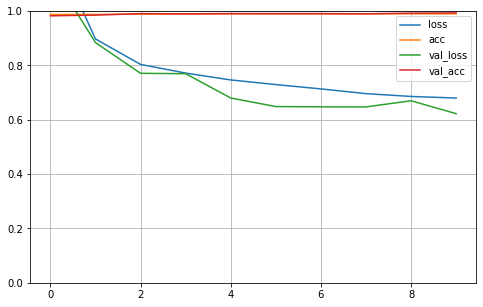

In [13]:
#Danh gia
score = model.evaluate(X_test, Y_test, verbose=0)
print('Sai số:', score[0])
print('Độ chính xác', score[1])
#Do thi
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

Dự đoán 

In [14]:
score = model.evaluate(X_test,Y_test,verbose=0)
print ('loss = ',score[0])
print ('abs error = ',score[1])

Y_predict = model.predict(X_test)
cal = pd.DataFrame(np.c_[Y_test,Y_predict],columns = ['theta1','theta2','t1 predict','t2 predict'])
cal

loss =  0.6380792856216431
abs error =  0.9911580681800842


,theta1,theta2,t1 predict,t2 predict
0,14.4,2.1,14.250446,3.642915
1,33.3,122.3,35.131935,122.216454
2,59.0,87.8,58.770397,87.826752
3,45.8,112.0,44.726429,111.911308
4,13.5,88.5,13.653610,88.171341
...,...,...,...,...
271995,78.5,18.6,78.198891,19.269878
271996,6.9,114.5,7.218812,114.503860
271997,57.0,60.4,56.628922,61.934994
271998,26.7,113.7,27.565250,113.683670
